# COMP801 - ASSIGNMENT #3 DATA ANALYSIS
# 20241360 - NEIL ARONN SARNE DIAMZON 
## Student Performance Factors

✅ Dataset approved on 18th Oct

### Objectives

The objective of this data analysis is to analyze the impact of various factors (Independent variables) on the students' performance. The final exam score (Dependent variable) will be the main metric for this analysis to represent the academic performance of the student. 

### Independent Variables (Numerical and Categorical)
- `Hours_Studied`	- Number of hours spent studying per week.
- `Attendance` - Percentage of classes attended.
- `Parental_Involvement` - Level of parental involvement in the student's education (Low, Medium, High).
- `Access_to_Resources` - Availability of educational resources (Low, Medium, High).
- `Extracurricular_Activities` - Participation in extracurricular activities (Yes, No).
- `Sleep_Hours` - Average number of hours of sleep per night.
- `Previous_Scores` - Scores from previous exams.
- `Motivation_Level` - Student's level of motivation (Low, Medium, High).
- `Internet_Access` - Availability of internet access (Yes, No).
- `Tutoring_Sessions` - Number of tutoring sessions attended per month.
- `Family_Income` - Family income level (Low, Medium, High).
- `Teacher_Quality` - Quality of the teachers (Low, Medium, High).
- `School_Type` - Type of school attended (Public, Private).
- `Peer_Influence` - Influence of peers on academic performance (Positive, Neutral, Negative).
- `Physical_Activity` - Average number of hours of physical activity per week.
- `Learning_Disabilities` - Presence of learning disabilities (Yes, No).
- `Parental_Education_Level` - Highest education level of parents (High School, College, Postgraduate).
- `Distance_from_Home` - Distance from home to school (Near, Moderate, Far).
- `Gender` - Gender of the student (Male, Female).
### Dependent Variable
- `Exam_Score` - Final exam score.

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Use Pandas to read csv

In [2]:
raw_df = pd.read_csv("spf.csv")

In [3]:
print("Raw data row count: " + str(len(raw_df)))

Raw data row count: 6607


In [4]:
raw_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Data cleaning process


**Dataset contains null values. We need to check if the null percentage is greater than 80% before dropping the columns/rows. Alternatively, we can drop the rows since removed rows are negligible.**

In [5]:
null_columns = raw_df.isnull().sum()
null_values_df = pd.DataFrame(null_columns, columns=['Number of null values'])
null_values_df["percentage"] = ((null_values_df[null_values_df["Number of null values"] > 0]/ len(raw_df))*100).round(2)
null_values_df[null_values_df["Number of null values"] > 0]

,Number of null values,percentage
Teacher_Quality,78,1.18
Parental_Education_Level,90,1.36
Distance_from_Home,67,1.01


**Dropping rows with null values**

In [6]:
cleaned_df = raw_df.dropna()
print("Data count after dropping null rows: " + str(len(cleaned_df)))

Data count after dropping null rows: 6378


**Checking for Duplicates and removing them to avoid Data Bias**

In [7]:
cleaned_df.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


**Changing all texts to lowercase to ensure consistency in the dataset**

In [8]:
# if a column is a string data type, convert to lowercase
cleaned_df = raw_df.map(lambda x: x.lower() if isinstance(x, str) else x)
cleaned_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,low,high,no,7,73,low,yes,0,low,medium,public,positive,3,no,high school,near,male,67
1,19,64,low,medium,no,8,59,low,yes,2,medium,medium,public,negative,4,no,college,moderate,female,61
2,24,98,medium,medium,yes,7,91,medium,yes,2,medium,medium,public,neutral,4,no,postgraduate,near,male,74
3,29,89,low,medium,yes,8,98,medium,yes,1,medium,medium,public,negative,4,no,high school,moderate,male,71
4,19,92,medium,medium,yes,6,65,medium,yes,3,medium,high,public,neutral,4,no,college,near,female,70


**Segregating numerical and categorical columns**
We only needed numerical columns

In [9]:
numerical_columns = cleaned_df.select_dtypes(exclude="object").columns
categorical_columns = cleaned_df.select_dtypes(include="object").columns

print("There are " + str(len(numerical_columns)) + " numerical columns ")

numerical_df = cleaned_df[numerical_columns]
categorical_df = cleaned_df[categorical_columns]

There are 7 numerical columns 


## Checking for outliers

In [10]:
# Provides a summary statistic of the numeric variables to check outliers
summary_df = numerical_df.describe().T
summary_df['median'] = numerical_df.median()
summary_df['mode'] = numerical_df.mode().iloc[0]
summary_df

,count,mean,std,min,25%,50%,75%,max,median,mode
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0,20.0,20
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0,80.0,67
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0,7.0,7
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0,75.0,66
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0,1.0,1
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0,3.0,3
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0,67.0,68


## Using M

### Histograms
**As seen below in the following histograms that there are no outliers or extreme values found within x-axis of each of the numerical columns of the dataset**

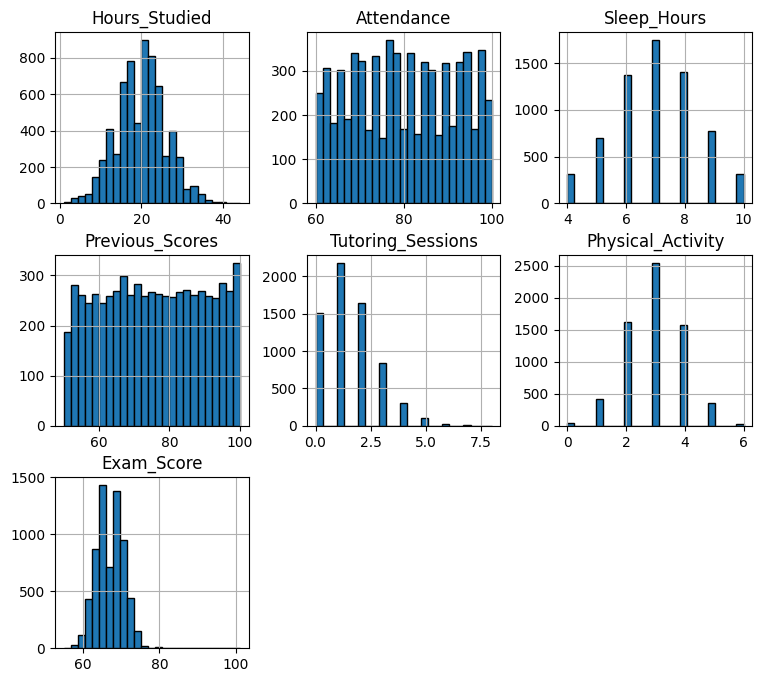

In [11]:
numerical_df.hist(bins=25, figsize=(9, 8), edgecolor='black')
plt.show()

### Box Plot
**As seen below that there are no outliers or extreme values that is way above the median level of each columns**
The outliers seen in hours_studied are acceptable because there is no anomalies with the numbers as hours_studied are per week and it is still in the acceptable range

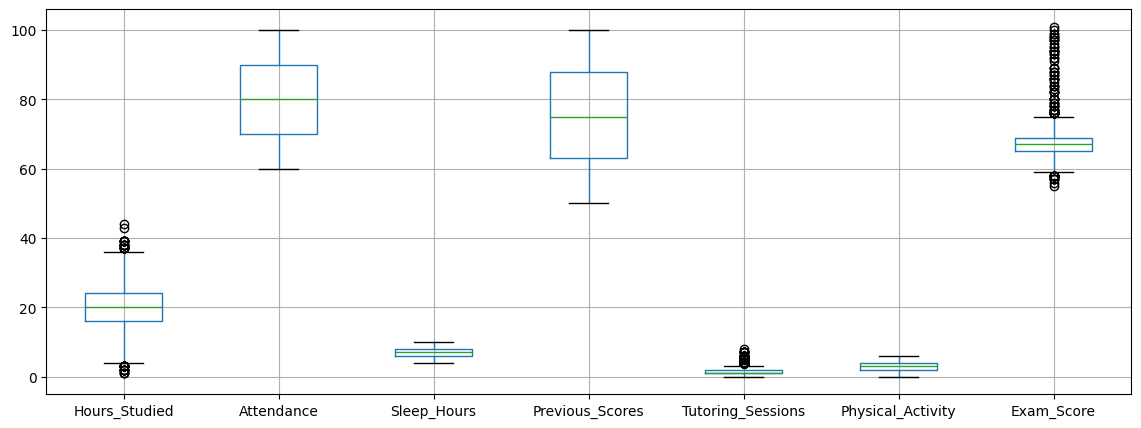

In [12]:
plt.figure(figsize=(14, 5))
numerical_df.boxplot()
plt.show()

## Visualizing the Demographics of the dataset

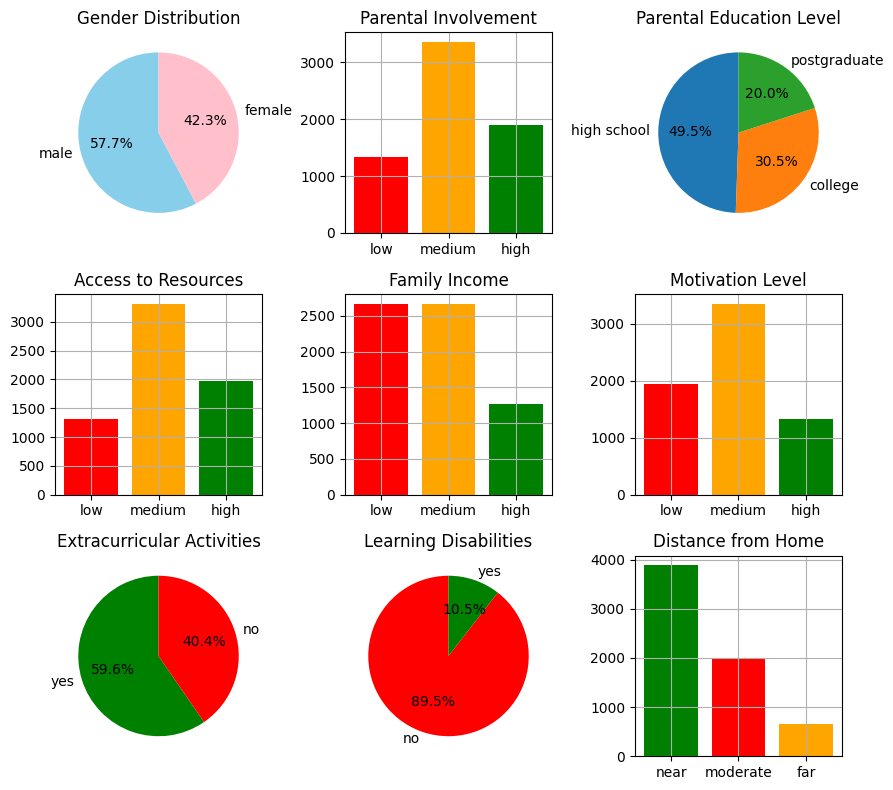

In [13]:
#gender_chart = categorical.groupby('Gender').size()
#gender_chart.plot.pie( autopct='%1.1f%%', figsize=(4, 5), startangle=140, title='Distribution by Gender')

#gender_chart

fig, ax = plt.subplots(3, 3, figsize=(9,8))

# Pie Chart

gender_data = categorical_df['Gender'].value_counts()
ax[0,0].pie(gender_data, labels=gender_data.index,  autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink']) 
ax[0,0].grid(True)
ax[0,0].set_title("Gender Distribution")

extracurricular_activities_data = categorical_df['Extracurricular_Activities'].value_counts()
ax[2,0].pie(extracurricular_activities_data, labels=extracurricular_activities_data.index,  autopct='%1.1f%%', startangle=90, colors=['green', 'red']) 
ax[2,0].grid(True)
ax[2,0].set_title("Extracurricular Activities")

learning_disabilities_data = categorical_df['Learning_Disabilities'].value_counts()
ax[2,1].pie(learning_disabilities_data, labels=learning_disabilities_data.index,  autopct='%1.1f%%', startangle=90, colors=['red', 'green']) 
ax[2,1].grid(True)
ax[2,1].set_title("Learning Disabilities")

parental_education_level_data = categorical_df['Parental_Education_Level'].value_counts()
ax[0,2].pie(parental_education_level_data, labels=parental_education_level_data.index,  autopct='%1.1f%%', startangle=90) 
ax[0,2].grid(True)
ax[0,2].set_title("Parental Education Level")

# Bar Charts
order = ['low','medium','high']
parental_involvement_data = categorical_df['Parental_Involvement'].value_counts().reindex(order)
ax[0,1].bar(parental_involvement_data.index, parental_involvement_data, color=['Red', 'Orange', 'Green'])
ax[0,1].grid(True)
ax[0,1].set_title("Parental Involvement")

access_to_resources_data = categorical_df['Access_to_Resources'].value_counts().reindex(order)
ax[1,0].bar(access_to_resources_data.index, access_to_resources_data, color=['Red', 'Orange', 'Green'])
ax[1,0].grid(True)
ax[1,0].set_title("Access to Resources")

family_income_data = categorical_df['Family_Income'].value_counts().reindex(order)
ax[1,1].bar(family_income_data.index, family_income_data, color=['Red', 'Orange', 'Green'])
ax[1,1].grid(True)
ax[1,1].set_title("Family Income")

motivation_level_data = categorical_df['Motivation_Level'].value_counts().reindex(order)
ax[1,2].bar(motivation_level_data.index, motivation_level_data, color=['Red', 'Orange', 'Green'])
ax[1,2].grid(True)
ax[1,2].set_title("Motivation Level")

distance_from_home_data = categorical_df['Distance_from_Home'].value_counts().reindex(['near', 'moderate', 'far'])
ax[2,2].bar(distance_from_home_data.index, distance_from_home_data, color=['Green', 'Red', 'Orange'])
ax[2,2].grid(True)
ax[2,2].set_title("Distance from Home")
# 	Hours_Studied	Attendance	Parental_Involvement	Access_to_Resources	Extracurricular_Activities	Sleep_Hours	
# Previous_Scores	Motivation_Level	Internet_Access	Tutoring_Sessions	Family_Income	Teacher_Quality	School_Type	Peer_Influence	
# Physical_Activity	Learning_Disabilities	Parental_Education_Level	Distance_from_Home	Gender	Exam_Score

fig.tight_layout()

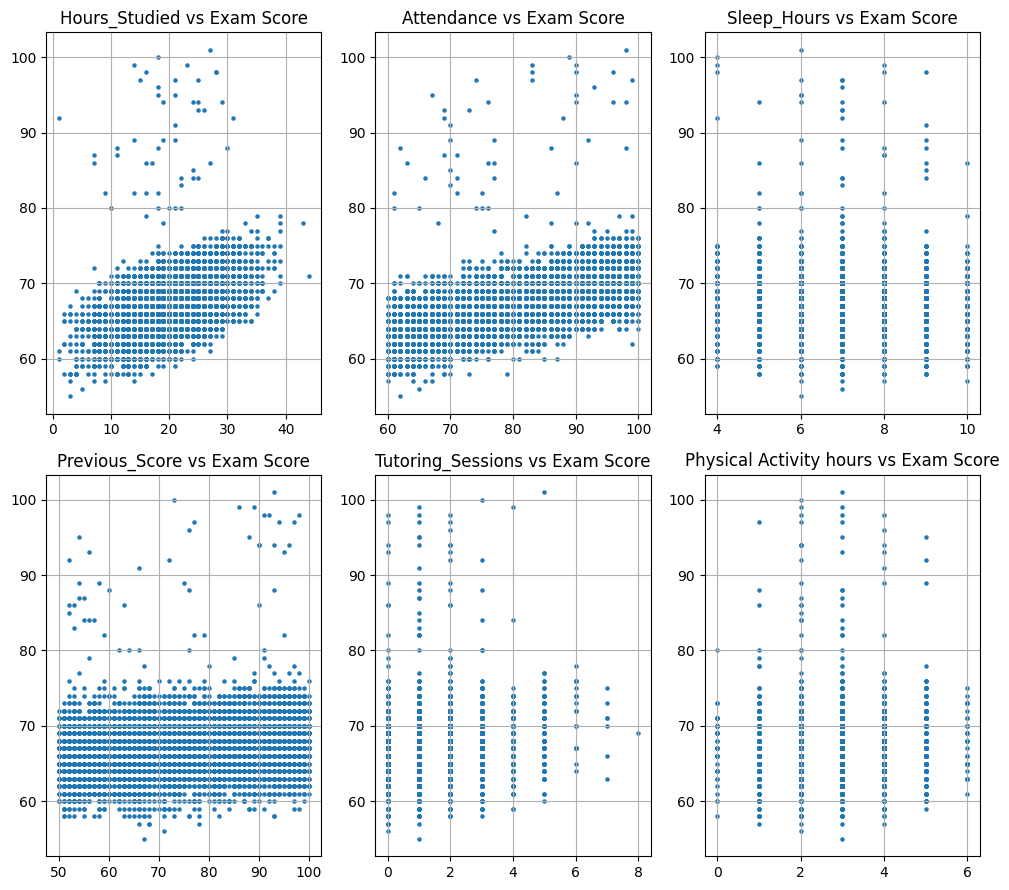

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(10,9))

ax[0,0].scatter(numerical_df["Hours_Studied"], numerical_df["Exam_Score"], s=5)
ax[0,0].grid(True)
ax[0,0].set_title("Hours_Studied vs Exam Score")

ax[0,1].scatter(numerical_df["Attendance"], numerical_df["Exam_Score"], s=5)
ax[0,1].grid(True)
ax[0,1].set_title("Attendance vs Exam Score")

ax[0,2].scatter(numerical_df["Sleep_Hours"], numerical_df["Exam_Score"], s=5)
ax[0,2].grid(True)
ax[0,2].set_title("Sleep_Hours vs Exam Score")

ax[1,0].scatter(numerical_df["Previous_Scores"], numerical_df["Exam_Score"], s=5)
ax[1,0].grid(True)
ax[1,0].set_title("Previous_Score vs Exam Score")

ax[1,1].scatter(numerical_df["Tutoring_Sessions"], numerical_df["Exam_Score"], s=5)
ax[1,1].grid(True)
ax[1,1].set_title("Tutoring_Sessions vs Exam Score")

ax[1,2].scatter(numerical_df["Physical_Activity"], numerical_df["Exam_Score"], s=5)
ax[1,2].grid(True)
ax[1,2].set_title("Physical Activity hours vs Exam Score")

fig.tight_layout()

## Data Analysis - Regression

### Correlation Matrix

In [15]:
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

### Plotting the Correlation Matrix for visualization

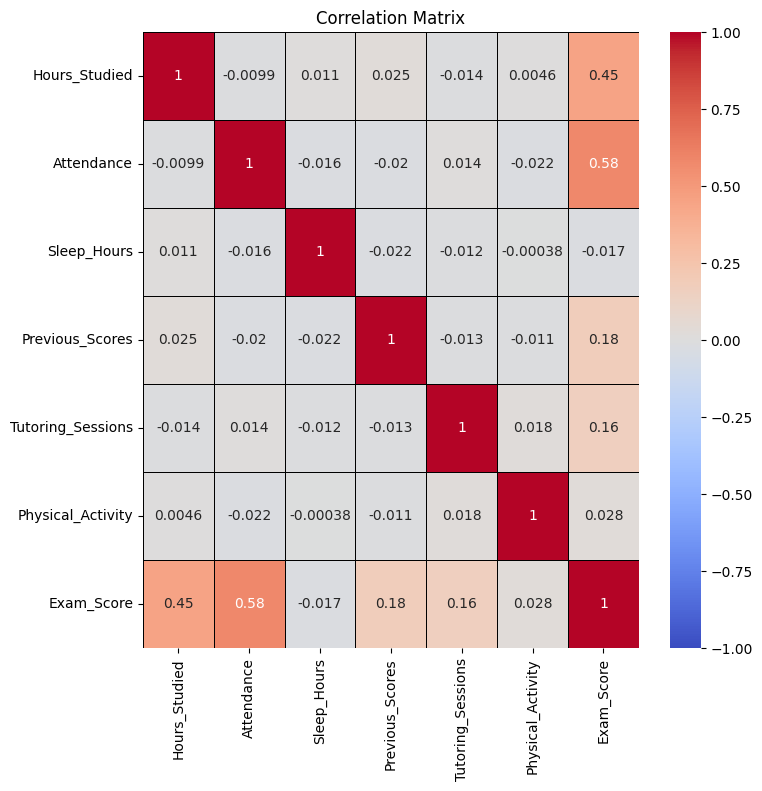

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Add title for clarity
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import math


In [18]:
IV_array = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
for index in range(len(IV_array)):
    x = numerical_df[[IV_array[index]]]
    y = numerical_df['Exam_Score']
    model = LinearRegression()
    model.fit(x,y)
    
    numerical_df = numerical_df.copy()
    # Predictions
    numerical_df['Predicted'] = model.predict(x)
    numerical_df['Residuals'] = y - numerical_df['Predicted']
    
    # Number of observations and predictors
    n = len(y)
    p = x.shape[1]
    
    intercept = model.intercept_
    coefficients = model.coef_
    mse = mean_squared_error(y, numerical_df['Predicted'])
    r2 = r2_score(y, numerical_df['Predicted'])
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    # F-statistic and p-value
    ssr = sum((numerical_df['Predicted'] - y.mean()) ** 2)  # Sum of Squares for Regression
    sse = sum(numerical_df['Residuals'] ** 2)  # Sum of Squares for Errors
    msr = ssr / p  # Mean Square for Regression
    mse_error = sse / (n - p - 1)  # Mean Square for Errors
    f_statistic = msr / mse_error
    p_value_f = 1 - stats.f.cdf(f_statistic, p, n - p - 1)
    
    # Output results
    print(f"Regression Statistics for: {IV_array[index]} vs Exam Scores")
    print(f"Intercept: {intercept}")
    print(f"Coefficients: {coefficients}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Multiple R: {math.sqrt(r2)}")
    print(f"R-squared: {r2}")
    print(f"Adjusted R-squared: {adjusted_r2}")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value for F-statistic: {p_value_f}")
    print('-------------------------------------------')

Regression Statistics for: Hours_Studied vs Exam Scores
Intercept: 61.45698360950408
Coefficients: [0.28929063]
Mean Squared Error (MSE): 12.130441879473997
Multiple R: 0.44545495407528196
R-squared: 0.19843011611021155
Adjusted R-squared: 0.19830875806571646
F-statistic: 1635.0800388705052
P-value for F-statistic: 1.1102230246251565e-16
-------------------------------------------
Regression Statistics for: Attendance vs Exam Scores
Intercept: 51.57857651128336
Coefficients: [0.19576872]
Mean Squared Error (MSE): 10.023660983826788
Multiple R: 0.581071863312064
R-squared: 0.33764451033295395
Adjusted R-squared: 0.3375442294109756
F-statistic: 3366.986498247669
P-value for F-statistic: 1.1102230246251565e-16
-------------------------------------------
Regression Statistics for: Sleep_Hours vs Exam Scores
Intercept: 67.55271606239072
Coefficients: [-0.04510659]
Mean Squared Error (MSE): 15.12897066050856
Multiple R: 0.01702162857150284
R-squared: 0.0002897358392262017
Adjusted R-squared:

### Interpretation:

1. `Hours_Studied` vs `Exam_Scores` - when hours studied is zero, the predicted exam score is approximately 61.46 *(intercept)*. For every additional hour of studying, the exam scores is preditect to increase by about 0.29 points *(coefficient)*.
    * Around 19.8% of the variance in the exam scores are explained by the number of hours studied, which could indicate a weak relationship *(r-squared)*. The result is similar to adjusted R-squared.
    * With an F-statistic of 1635.08 and p-value of  1.1102230246251565e-1 *(almost zero)*, it suggests that the model is statistically significant, but the weak R-squared suggests that the hours studied alone may not be a strong predictor.

  
2. `Attendance` vs `Exam_Score` - when the attendance is zero, the predicted exam score is approximately 51.58 *(intercept)*. For every additional attendance, the exam scores increase by around 0.20 points *(coefficient)*.
    * Around 33.8% of the variance in the exam scores are explained by the attendance, which could indicate a moderate relationship *(r-squared)*.
    * With an F-statistic of 3366.99 and p-value of 1.1102230246251565e-16 *(almost zero)*, it suggests that the model is highly significant, and the attendance variable may be a strong predictor.


3. `Sleep_Hours` vs `Exam Scores` - when there's no sleep hours, the predicted exam score is 67.55. *(intercept)*. A *coefficient* of -0.045 indicates that a small, negative relationship exists between sleep hours and exam scores.
    * The sleep hours explain less than 0.03% of the variance in exam scores, suggesting no meaningful relationship *(r-squared)*.
    * With an F-statistic of 1.91 and p-value of 0.166), the model is not statistically significant *(because p-values >= 0.05)*. Sleep hours do not predict exam scores effectively.

  
4. `Previous_Scores` vs `Exam Scores` - when previous exam score is 0, the predicted exam scores for the current tests ia around 63.68 *(intercept)*. An additional point increase in the previous exam corresponds to about 0.047 increase in exam scores *(coefficient)*.
    * The previous scores explain only 3.1% of the variance which suggests a weak relationship the exam scores *(r-squared)*.
    * With an F-statistic of 208.86 and the p-value of 1.1102230246251565e-16 *(almost zero)*, the model is statistically significant, but its practical usefulness is limited.

  
5. `Tutoring_Sessions` vs `Exam Scores` - if tutoring sessions are none, the predicted exam score is about 66.50 *(intercept)*. Each additional tutoring session increases exam scores by about 0.50 points *(coefficient)*.
    * The tutoring sessions explain 2.4% of the variance, indicating a very weak relationship *(r-squared)*.
    * With an F-statistic of 165.89 and the p-value of 1.1102230246251565e-16 *(almost zero)*, the model is statistically significant but lacks practical impact *(because the F-statistic is low).*
  
6. `Physical_Activity` vs `Exam Scores` - when physical activity is none, the predicted exam score is about 66.92 *(intercept)*. For each session of a physical activity, exam scores increase by 0.105 points *(coefficient)*.
    * Since r-squared is 0.00077, it means that physical activity explains less than 0.1% of the variance in exam scores, suggesting almost no relationship.
    * With an F-statistic of 5.12 and the p-value of  around 0.24, the model is statistically significant, but since F-statistic is very low, the impact or explanatory power of physical activity to exam scores is negligible.

## ANOVA 

In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

**ANOVA tables**

In [20]:

for index in range(len(IV_array)):
    iv = IV_array[index]
    dv = 'Exam_Score'
    formula = f'{dv} ~ C({iv})'
    model = ols(formula, data=numerical_df).fit()
    anova_table = anova_lm(model, typ=2)
    display(anova_table)

,sum_sq,df,F,PR(>F)
C(Hours_Studied),20667.004618,40.0,42.770151,4.032552e-294
Residual,79319.074086,6566.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Attendance),34213.397790,40.0,85.38696,0.0
Residual,65772.680914,6566.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Sleep_Hours),61.722190,6.0,0.679458,0.666294
Residual,99924.356515,6600.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Previous_Scores),3714.826609,50.0,5.059538,3.104737e-28
Residual,96271.252095,6556.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Tutoring_Sessions),2575.689707,8.0,21.807736,4.304699e-33
Residual,97410.388997,6598.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Physical_Activity),123.770591,6.0,1.363354,0.225383
Residual,99862.308113,6600.0,NaN,NaN
